## Data Preprocessing



In [1]:
#packages needed

#ignore warnings about future changes in functions as they take too much space

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter

import sys

!{sys.executable} -m pip install numpy

import numpy as np 

!{sys.executable} -m pip install pandas

import pandas as pd

#Natrual Language ToolKit (NLTK)

!{sys.executable} -m pip install nltk

import nltk

#text normalization function

%run ./Text_Normalization_Function.ipynb

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

#ignore warnings about future changes in functions as they take too much space

warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/CAROLINE/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/CAROLINE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/CAROLINE/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/CAROLINE/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [2]:
#import pachages

import json

import numpy as np

import pandas as pd

In [3]:
# Load the two dataset:business and reviews
businesses = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)

reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)

In [4]:
#converse the json file to dataframe
for business in businesses:

    subset_business = business

    break

for review in reviews:

    subset_review = review

    break

In [5]:
# Show the two dataset
display(subset_business.head(5))

display(subset_review.head(5))
print(subset_business.columns)

print(subset_review.columns)

business_id                     name              address  \
0  6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom         921 Pearl St   
1  tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX  7000 NE Airport Way   
2  bvN78flM8NLprQ1a1y5dRg           The Reclaimory   4720 Hawthorne Ave   
3  oaepsyvc0J17qwi8cfrOWg              Great Clips   2566 Enterprise Rd   
4  PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus  1046 Memorial Dr SE   

          city state postal_code   latitude   longitude  stars  review_count  \
0      Boulder    CO       80302  40.017544 -105.283348    4.0            86   
1     Portland    OR       97218  45.588906 -122.593331    4.0           126   
2     Portland    OR       97214  45.511907 -122.613693    4.5            13   
3  Orange City    FL       32763  28.914482  -81.295979    3.0             8   
4      Atlanta    GA       30316  33.747027  -84.353424    4.0            14   

   is_open                                         attributes  \
0        1  {'RestaurantsTableService': 'True', 'WiFi': 'u...   
1        1  {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
2        1  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
3        1  {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
4        1  {'GoodForKids': 'False', 'BusinessParking': '{...   

                                          categories  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...   
1  Salad, Soup, Sandwiches, Delis, Restaurants, C...   
2  Antiques, Fashion, Used, Vintage & Consignment...   
3                         Beauty & Spas, Hair Salons   
4  Gyms, Active Life, Interval Training Gyms, Fit...   

                                               hours  
0  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...  
1  {'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...  
2  {'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...  
3                                               None  
4  {'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...

review_id                 user_id             business_id  \
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  buF9druCkbuXLX526sGELQ   
1  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  RA4V8pr014UyUbDvI-LW2A   
2  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  _sS2LBIGNT5NQb6PD1Vtjw   
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  0AzLzHfOJgL7ROwhdww2ew   
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  8zehGz9jnxPqXtOc7KaJxA   

   stars  useful  funny  cool  \
0      4       3      1     1   
1      4       1      0     0   
2      5       0      0     0   
3      2       1      1     1   
4      4       0      0     0   

                                                text                date  
0  Apparently Prides Osteria had a rough summer a... 2014-10-11 03:34:02  
1  This store is pretty good. Not as great as Wal... 2015-07-03 20:38:25  
2  I called WVM on the recommendation of a couple... 2013-05-28 20:38:06  
3  I've stayed at many Marriott and Renaissance M... 2010-01-08 02:29:15  
4  The food is always great here. The service fro... 2011-07-28 18:05:01

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


## Filter data

In [6]:
# Step 1.1 : Filter out the operating status [open ] from business

is_open= subset_business[subset_business['is_open']==1]

is_open.shape

(123248, 14)

In [7]:
# Step 1.2: Filter out the all the restaurants from from business
Restaurant = is_open[is_open['categories'].str.contains('Restaurants.*')==True].reset_index()
Restaurant['business_id'].value_counts()

6iYb2HFDywm3zjuRg0shjw    1
ywQURBD1vMyztDfIeiWtGQ    1
jhHhD-DLspBoq-dSzSy9Tg    1
MdEVBlf_8U8WntGXR2L7IA    1
Kw2S-j05UWmnXvrWeLLZPQ    1
                         ..
Jfo67szC_PYNYRaC8KE0EA    1
zqDaDcrPJbecQhT4z6okIg    1
k_JMC4M3BJ4X9pC5X3h1fQ    1
yBkztzlvdYNpjPcmZcJ3Ug    1
GB75wPibj3IjNauaoCxyGA    1
Name: business_id, Length: 32022, dtype: int64

#### Select variables and Comebine the two dataset

In [8]:
df_review = subset_review[['business_id','stars','text','date']]
df_review

business_id  stars  \
0       buF9druCkbuXLX526sGELQ      4   
1       RA4V8pr014UyUbDvI-LW2A      4   
2       _sS2LBIGNT5NQb6PD1Vtjw      5   
3       0AzLzHfOJgL7ROwhdww2ew      2   
4       8zehGz9jnxPqXtOc7KaJxA      4   
...                        ...    ...   
999995  xOr2jdTnIRFK-ou3WaK7Rw      5   
999996  nZ-dwJs32B6bJdmae1AB3Q      5   
999997  5BNRsSDddMgeba1UQ2aX5g      5   
999998  nJx3CI1grAFz1m9DO4CN-g      5   
999999  ZnT8Fiyb0oCkhbygsq_Q6Q      5   

                                                     text                date  
0       Apparently Prides Osteria had a rough summer a... 2014-10-11 03:34:02  
1       This store is pretty good. Not as great as Wal... 2015-07-03 20:38:25  
2       I called WVM on the recommendation of a couple... 2013-05-28 20:38:06  
3       I've stayed at many Marriott and Renaissance M... 2010-01-08 02:29:15  
4       The food is always great here. The service fro... 2011-07-28 18:05:01  
...                                                   ...                 ...  
999995  I love Peruvian food. I've tried dozens of spo... 2016-01-19 23:59:52  
999996  Great hotel. Best Hampton I've stayed in. Room... 2017-05-29 02:32:51  
999997  This is a few steps from my house. I have to s... 2015-09-02 22:12:55  
999998  I first experienced Kome in the three-hour com... 2016-04-15 18:11:37  
999999  We had our family pictures taken with inGrace ... 2012-01-07 06:13:30  

[1000000 rows x 4 columns]

In [9]:
restaurant = Restaurant[['business_id', 'name',"review_count",'categories' ]]

restaurant

business_id                     name  review_count  \
0      6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom            86   
1      tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX           126   
2      D4JtQNTI4X3KcbzacDJsMw      Bob Likes Thai Food           169   
3      jFYIsSb7r1QeESVUnXPHBw          Boxwood Biscuit            11   
4      HPA_qyMEddpAEtFof02ixg      Mr G's Pizza & Subs            39   
...                       ...                      ...           ...   
32017  yQL8SrSETbbCI1U5esVJQw      Ciao! Pizza & Pasta           733   
32018  r5Uag1JqYjr2nbxQCVqm8A    Saigon Noodle & Grill           437   
32019  Q78fYV6B6P6GmX07YVgi4g    Maudie’s Hill Country           310   
32020  uXdQkuEtvLAzfc3MsO-sTQ     Mama's Cocina Latina           185   
32021  GB75wPibj3IjNauaoCxyGA              Havana Cafe            10   

                                              categories  
0      Gastropubs, Food, Beer Gardens, Restaurants, B...  
1      Salad, Soup, Sandwiches, Delis, Restaurants, C...  
2                                      Restaurants, Thai  
3                        Breakfast & Brunch, Restaurants  
4                               Food, Pizza, Restaurants  
...                                                  ...  
32017                        Restaurants, Pizza, Italian  
32018  Restaurants, Noodles, Salad, Vietnamese, Veget...  
32019     Mexican, Bars, Nightlife, Tex-Mex, Restaurants  
32020               Restaurants, Mexican, Latin American  
32021              Cuban, Sandwiches, Restaurants, Cafes  

[32022 rows x 4 columns]

In [10]:
# Combined Yelp dataset

combined_business_data = pd.merge(df_review, restaurant, on='business_id')

combined_business_data


business_id  stars  \
0       0AzLzHfOJgL7ROwhdww2ew      2   
1       0AzLzHfOJgL7ROwhdww2ew      4   
2       0AzLzHfOJgL7ROwhdww2ew      4   
3       0AzLzHfOJgL7ROwhdww2ew      4   
4       0AzLzHfOJgL7ROwhdww2ew      4   
...                        ...    ...   
511078  EFcJk7hVfM8aEnuKqg4rKQ      1   
511079  Roec1WahfAkQlGGplJWfNg      5   
511080  i0XGDfTYQAdZcEaYWY3Zdw      5   
511081  RodEnRx_LNO-M4FswgviSQ      5   
511082  cvhGutl21t4tQefBkdqQKA      4   

                                                     text                date  \
0       I've stayed at many Marriott and Renaissance M... 2010-01-08 02:29:15   
1       I was a there for a professional conference. s... 2011-09-26 00:30:39   
2       I stayed for five nights this past April with ... 2009-05-20 15:25:54   
3       I stayed here recently for a conference I was ... 2016-01-30 18:26:13   
4       I picked Renaissance based on the pool slides ... 2018-08-05 01:18:32   
...                                                   ...                 ...   
511078  The service was horrible tonight.  I waited fo... 2018-04-06 23:05:29   
511079  Just bought a pair of pannier bags from this s... 2017-07-30 19:32:53   
511080  I love Krystal's! And, being so close to the o... 2015-03-06 21:19:22   
511081  Thanks to Ivan's recommendation, the mister an... 2009-06-06 23:54:34   
511082  Incredible butter chicken & bbq pizza, definit... 2017-11-19 07:23:24   

                                   name  review_count  \
0       Renaissance Orlando at SeaWorld           290   
1       Renaissance Orlando at SeaWorld           290   
2       Renaissance Orlando at SeaWorld           290   
3       Renaissance Orlando at SeaWorld           290   
4       Renaissance Orlando at SeaWorld           290   
...                                 ...           ...   
511078                       McDonald's            20   
511079                      The Spindle            11   
511080                          Krystal            13   
511081                       Badda Bing            16   
511082                    Hot Pan Pizza             6   

                                               categories  
0       Hotels, Hotels & Travel, Restaurants, Event Pl...  
1       Hotels, Hotels & Travel, Restaurants, Event Pl...  
2       Hotels, Hotels & Travel, Restaurants, Event Pl...  
3       Hotels, Hotels & Travel, Restaurants, Event Pl...  
4       Hotels, Hotels & Travel, Restaurants, Event Pl...  
...                                                   ...  
511078  Restaurants, Fast Food, Burgers, Coffee & Tea,...  
511079  Fashion, Accessories, Shopping, Sporting Goods...  
511080                    Burgers, Restaurants, Fast Food  
511081  Event Planning & Services, American (New), Cat...  
511082  Chicken Wings, Chicken Shop, Restaurants, Pizz...  

[511083 rows x 7 columns]

In [11]:
#calculate the average stars for all merchants in the dataset
combined_business_data['stars'].mean()

3.795667239959067

(array([ 55958.,      0.,  43951.,      0.,      0.,  63276.,      0.,
        133277.,      0., 214621.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

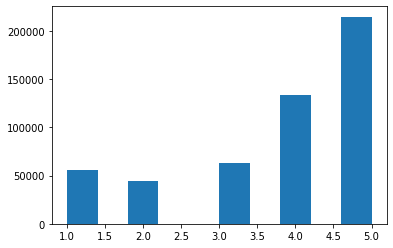

In [12]:
# Filtering out the ratings
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(combined_business_data['stars'])

In [13]:
# Step 2 : Filter out the merchants between 3 and 3.7
groupby=combined_business_data.groupby('name')['stars'].mean()

selected=pd.DataFrame(groupby)

lowstar_rest=selected[(selected['stars']>3)&(selected['stars']<=3.79)]

lowstar_rest

stars
name                                            
 Gruby's New York Deli                  3.752000
110 Grill                               3.767857
126 Chinese Restaurant                  3.609272
13 Virtues Brewing                      3.352941
163 Vietnamese Sandwiches & Bubble Tea  3.694286
...                                          ...
azul tequila taqueria milwaukie         3.647059
blu on the avenue                       3.636719
honeygrow                               3.625000
la Madeleine French Bakery & Cafe       3.363636
sweetgreen                              3.680556

[1505 rows x 1 columns]

In [14]:
#Step 3: filtering out the number of reviews

text_group=combined_business_data.groupby('name')['text'].count()

selected_textcount=pd.DataFrame(text_group)

large_reviews_rest=selected_textcount[selected_textcount['text']>112]

large_reviews_rest

text
name                                        
 Gruby's New York Deli                   125
'Ohana                                   172
12 West                                  161
126 Chinese Restaurant                   151
163 Vietnamese Sandwiches & Bubble Tea   350
...                                      ...
Zuma                                     126
Zunzi's                                  236
Zuzu Handmade Mexican Food               233
bartaco                                 1309
blu on the avenue                        256

[1163 rows x 1 columns]

In [15]:
# Comebine the mercants in Step 2 and step 3
Final_rest=pd.merge(large_reviews_rest, lowstar_rest, on='name')

Final_rest=Final_rest.drop(['text'], axis = 1)

Final_rest

stars
name                                            
 Gruby's New York Deli                  3.752000
126 Chinese Restaurant                  3.609272
163 Vietnamese Sandwiches & Bubble Tea  3.694286
34th Street Cafe                        3.510949
4th Street Bar & Grill                  3.691489
...                                          ...
Zen Japanese Food Fast                  3.448669
Zoe's Chinese Restaurant                3.669091
Zuma                                    3.785714
Zuzu Handmade Mexican Food              3.283262
blu on the avenue                       3.636719

[422 rows x 1 columns]

In [16]:
# Select the target merchants and their reviews from the combined dataset

df=pd.merge(Final_rest,combined_business_data, on='name')
df


name   stars_x             business_id  stars_y  \
0        Gruby's New York Deli  3.752000  dqZWU5lP2ElXxJK3kY2NwA        5   
1        Gruby's New York Deli  3.752000  dqZWU5lP2ElXxJK3kY2NwA        4   
2        Gruby's New York Deli  3.752000  dqZWU5lP2ElXxJK3kY2NwA        5   
3        Gruby's New York Deli  3.752000  dqZWU5lP2ElXxJK3kY2NwA        5   
4        Gruby's New York Deli  3.752000  dqZWU5lP2ElXxJK3kY2NwA        4   
...                        ...       ...                     ...      ...   
124533       blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        5   
124534       blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        4   
124535       blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        1   
124536       blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        4   
124537       blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        3   

                                                     text                date  \
0       Great food and service. French toast with stra... 2016-07-03 17:07:35   
1       I've lived in Brookhaven for years and am from... 2016-12-04 16:53:59   
2       Very yummy deli near Northside Hospital. The m... 2017-12-03 04:54:11   
3       Excellent food.  One of the few places that st... 2018-05-29 16:50:41   
4       Gruby's is the reason I look forward to doctor... 2007-06-05 16:38:01   
...                                                   ...                 ...   
124533  What a wonderful experience! I came her for a ... 2018-11-27 18:12:02   
124534  On the whole, a great dining experience featur... 2017-07-16 18:09:52   
124535  worst experience ever!!!  slowest service, com... 2018-12-10 02:55:18   
124536  The perfect option for a leisurely luncheon. \... 2020-10-13 19:11:13   
124537  Celebrating daughter's 30th birthday, so speci... 2021-01-16 20:13:50   

        review_count                                         categories  
0                121  Delis, Event Planning & Services, Restaurants,...  
1                121  Delis, Event Planning & Services, Restaurants,...  
2                121  Delis, Event Planning & Services, Restaurants,...  
3                121  Delis, Event Planning & Services, Restaurants,...  
4                121  Delis, Event Planning & Services, Restaurants,...  
...              ...                                                ...  
124533           251  American (New), Seafood, Restaurants, Breakfas...  
124534           251  American (New), Seafood, Restaurants, Breakfas...  
124535           251  American (New), Seafood, Restaurants, Breakfas...  
124536           251  American (New), Seafood, Restaurants, Breakfas...  
124537           251  American (New), Seafood, Restaurants, Breakfas...  

[124538 rows x 8 columns]

#### Select out 10 restuarants with most reviews
<br> create 10 seperate dataset and began sentiment analysis for each category

In [17]:
df1=df.groupby('categories').count()

df1=df1.sort_values(by='review_count',axis=0,ascending = False)

df1=df1[0:30]
df1
#Mexican,Bar,American (Traditional),Breakfast & Brunch,Chinese,Japanese,Italian,Indian,Barbeque,Latin American

name  stars_x  \
categories                                                          
Restaurants, Mexican                                2686     2686   
Beer Bar, Seafood, Restaurants, Bars, Nightlife     2180     2180   
Restaurants, Burgers, American (Traditional)        1638     1638   
Pakistani, Hot Dogs, Desserts, Food, Restaurant...  1625     1625   
Mexican, Restaurants                                1620     1620   
Restaurants, Barbeque, Pizza                        1313     1313   
Amusement Parks, Active Life, Performing Arts, ...  1116     1116   
Soul Food, Restaurants, Southern, Nightlife, Lo...  1108     1108   
Italian, Pizza, Restaurants                         1000     1000   
Bars, Nightlife, American (Traditional), Sports...   943      943   
Italian, Caterers, Venues & Event Spaces, Resta...   941      941   
Sandwiches, Food, Restaurants, Breakfast & Brun...   885      885   
Soul Food, Comfort Food, Breakfast & Brunch, Re...   829      829   
Chinese, Restaurants                                 826      826   
Japanese, Restaurants, Sushi Bars                    823      823   
Ramen, Restaurants, Asian Fusion, Japanese           809      809   
Barbeque, Restaurants, Chinese, Seafood              792      792   
Bars, Pizza, American (New), Nightlife, Restaur...   751      751   
Restaurants, Nightlife, Tex-Mex, Cocktail Bars,...   733      733   
Restaurants, Chinese                                 700      700   
Restaurants, Thai                                    690      690   
Latin American, Tapas Bars, Brazilian, Restaurants   677      677   
Ramen, Restaurants, Japanese                         667      667   
Lounges, Cinema, Restaurants, Nightlife, Bars, ...   666      666   
Restaurants, Spanish, Tapas/Small Plates, Moroc...   662      662   
Bars, Burgers, Food, American (New), Breakfast ...   653      653   
Music Venues, Pizza, Arts & Entertainment, Chic...   652      652   
Latin American, Restaurants, Bars, Caribbean, S...   643      643   
Tapas Bars, Restaurants                              641      641   
Restaurants, Italian, Sandwiches, American (Tra...   609      609   

                                                    business_id  stars_y  \
categories                                                                 
Restaurants, Mexican                                       2686     2686   
Beer Bar, Seafood, Restaurants, Bars, Nightlife            2180     2180   
Restaurants, Burgers, American (Traditional)               1638     1638   
Pakistani, Hot Dogs, Desserts, Food, Restaurant...         1625     1625   
Mexican, Restaurants                                       1620     1620   
Restaurants, Barbeque, Pizza                               1313     1313   
Amusement Parks, Active Life, Performing Arts, ...         1116     1116   
Soul Food, Restaurants, Southern, Nightlife, Lo...         1108     1108   
Italian, Pizza, Restaurants                                1000     1000   
Bars, Nightlife, American (Traditional), Sports...          943      943   
Italian, Caterers, Venues & Event Spaces, Resta...          941      941   
Sandwiches, Food, Restaurants, Breakfast & Brun...          885      885   
Soul Food, Comfort Food, Breakfast & Brunch, Re...          829      829   
Chinese, Restaurants                                        826      826   
Japanese, Restaurants, Sushi Bars                           823      823   
Ramen, Restaurants, Asian Fusion, Japanese                  809      809   
Barbeque, Restaurants, Chinese, Seafood                     792      792   
Bars, Pizza, American (New), Nightlife, Restaur...          751      751   
Restaurants, Nightlife, Tex-Mex, Cocktail Bars,...          733      733   
Restaurants, Chinese                                        700      700   
Restaurants, Thai                                           690      690   
Latin American, Tapas Bars, Brazilian, Restaurants          677      677   
Ramen, Restaurants,

In [18]:
#Mexican,Bar,American (Traditional),Breakfast & Brunch,Chinese,Japanese,Italian,Indian,Barbeque,Latin American
Mexican=df[df['categories'].str.contains('Mexican.*')==True].reset_index()
Mexican


index                        name   stars_x             business_id  \
0        2738           Amelia's Taqueria  3.337278  J4Oln2xg4LR9_jbRuQNYjQ   
1        2739           Amelia's Taqueria  3.337278  J4Oln2xg4LR9_jbRuQNYjQ   
2        2740           Amelia's Taqueria  3.337278  J4Oln2xg4LR9_jbRuQNYjQ   
3        2741           Amelia's Taqueria  3.337278  J4Oln2xg4LR9_jbRuQNYjQ   
4        2742           Amelia's Taqueria  3.337278  J4Oln2xg4LR9_jbRuQNYjQ   
...       ...                         ...       ...                     ...   
11917  124277  Zuzu Handmade Mexican Food  3.283262  iFofOanM-8rT21M0SHNjoA   
11918  124278  Zuzu Handmade Mexican Food  3.283262  iFofOanM-8rT21M0SHNjoA   
11919  124279  Zuzu Handmade Mexican Food  3.283262  iFofOanM-8rT21M0SHNjoA   
11920  124280  Zuzu Handmade Mexican Food  3.283262  iFofOanM-8rT21M0SHNjoA   
11921  124281  Zuzu Handmade Mexican Food  3.283262  iFofOanM-8rT21M0SHNjoA   

       stars_y                                               text  \
0            5  This place has fresh, authentic food. It's alw...   
1            4  Great service - they are very nice here. Ingre...   
2            3  Good place. Good food. Service is a meh. They ...   
3            5  Horchata!!! Fresh juices and they boil the chi...   
4            1  As a SoCal chick, this has got to be one of th...   
...        ...                                                ...   
11917        5  My wife and I have picked up food a couple tim...   
11918        3  I came here hungry and ready to  really enjoy ...   
11919        5  Definitely not Tex/Mex, and that is the beauty...   
11920        5  This place has THE best tasting food!  Their t...   
11921        4  I read most of the other reviews, and decided ...   

                     date  review_count  \
0     2015-11-05 23:49:21           160   
1     2015-01-03 23:48:59           160   
2     2017-02-19 12:20:15           160   
3     2015-08-19 15:41:25           160   
4     2018-01-21 16:42:43           160   
...                   ...           ...   
11917 2020-12-01 00:40:03           224   
11918 2020-01-17 00:16:09           224   
11919 2021-01-17 05:49:44           224   
11920 2021-01-15 17:08:22           224   
11921 2011-09-05 14:25:20           224   

                                              categories  
0                                   Restaurants, Mexican  
1                                   Restaurants, Mexican  
2                                   Restaurants, Mexican  
3                                   Restaurants, Mexican  
4                                   Restaurants, Mexican  
...                                                  ...  
11917  Mexican, Caterers, Restaurants, Event Planning...  
11918  Mexican, Caterers, Restaurants, Event Planning...  
11919  Mexican, Caterers, Restaurants, Event Planning...  
11920  Mexican, Caterers, Restaurants, Event Planning...  
11921  Mexican, Caterers, Restaurants, Event Planning...  

[11922 rows x 9 columns]

In [19]:
Bar=df[df['categories'].str.contains('Bar.*')==True].reset_index()
Bar

index                                    name   stars_x  \
0         276  163 Vietnamese Sandwiches & Bubble Tea  3.694286   
1         277  163 Vietnamese Sandwiches & Bubble Tea  3.694286   
2         278  163 Vietnamese Sandwiches & Bubble Tea  3.694286   
3         279  163 Vietnamese Sandwiches & Bubble Tea  3.694286   
4         280  163 Vietnamese Sandwiches & Bubble Tea  3.694286   
...       ...                                     ...       ...   
61218  124533                       blu on the avenue  3.636719   
61219  124534                       blu on the avenue  3.636719   
61220  124535                       blu on the avenue  3.636719   
61221  124536                       blu on the avenue  3.636719   
61222  124537                       blu on the avenue  3.636719   

                  business_id  stars_y  \
0      BXlYwqIWf8m7qk1RFMKCeQ        4   
1      BXlYwqIWf8m7qk1RFMKCeQ        4   
2      BXlYwqIWf8m7qk1RFMKCeQ        5   
3      BXlYwqIWf8m7qk1RFMKCeQ        5   
4      BXlYwqIWf8m7qk1RFMKCeQ        3   
...                       ...      ...   
61218  kfKNA74PbDa-SzSZpkoovg        5   
61219  kfKNA74PbDa-SzSZpkoovg        4   
61220  kfKNA74PbDa-SzSZpkoovg        1   
61221  kfKNA74PbDa-SzSZpkoovg        4   
61222  kfKNA74PbDa-SzSZpkoovg        3   

                                                    text                date  \
0      The only spot in China Town where I get Banh M... 2015-05-12 16:58:54   
1      $3 banh mi, other readymade meals like curry c... 2010-08-21 20:14:11   
2      This was my first time trying Banh Mi and I di... 2009-03-01 19:41:23   
3      Amazing sandwiches for only $2.75. The bread i... 2008-08-18 23:56:54   
4      Banh mi is heaven always fresh and delicious. ... 2010-08-21 22:48:41   
...                                                  ...                 ...   
61218  What a wonderful experience! I came her for a ... 2018-11-27 18:12:02   
61219  On the whole, a great dining experience featur... 2017-07-16 18:09:52   
61220  worst experience ever!!!  slowest service, com... 2018-12-10 02:55:18   
61221  The perfect option for a leisurely luncheon. \... 2020-10-13 19:11:13   
61222  Celebrating daughter's 30th birthday, so speci... 2021-01-16 20:13:50   

       review_count                                         categories  
0               336  Restaurants, Vietnamese, Coffee & Tea, Delis, ...  
1               336  Restaurants, Vietnamese, Coffee & Tea, Delis, ...  
2               336  Restaurants, Vietnamese, Coffee & Tea, Delis, ...  
3               336  Restaurants, Vietnamese, Coffee & Tea, Delis, ...  
4               336  Restaurants, Vietnamese, Coffee & Tea, Delis, ...  
...             ...                                                ...  
61218           251  American (New), Seafood, Restaurants, Breakfas...  
61219           251  American (New), Seafood, Restaurants, Breakfas...  
61220           251  American (New), Seafood, Restaurants, Breakfas...  
61221           251  American (New), Seafood, Restaurants, Breakfas...  
61222           251  American (New), Seafood, Restaurants, Breakfas...  

[61223 rows x 9 columns]

In [20]:
American_Traditional=df[(df['categories'].str.contains('Traditional.*')==True)&(df['categories'].str.contains('American.*')==True)].reset_index()
American_Traditional

index           name   stars_x             business_id  stars_y  \
0         951    75 Chestnut  3.739496  qVNYCZi2ofv-oe293JsYkg        1   
1         952    75 Chestnut  3.739496  qVNYCZi2ofv-oe293JsYkg        5   
2         953    75 Chestnut  3.739496  qVNYCZi2ofv-oe293JsYkg        3   
3         954    75 Chestnut  3.739496  qVNYCZi2ofv-oe293JsYkg        5   
4         955    75 Chestnut  3.739496  qVNYCZi2ofv-oe293JsYkg        5   
...       ...            ...       ...                     ...      ...   
32537  120902  World of Beer  3.535912  lWgYF_UsCuwVeEgwKwwUuQ        5   
32538  120903  World of Beer  3.535912  lWgYF_UsCuwVeEgwKwwUuQ        4   
32539  120904  World of Beer  3.535912  lWgYF_UsCuwVeEgwKwwUuQ        2   
32540  120905  World of Beer  3.535912  lWgYF_UsCuwVeEgwKwwUuQ        2   
32541  120906  World of Beer  3.535912  lWgYF_UsCuwVeEgwKwwUuQ        4   

                                                    text                date  \
0      Once Beacon Hills favorite 'local'.....until n... 2017-07-08 18:35:05   
1      So 75 Chestnut reopened a couple of weeks ago ... 2006-05-25 03:11:49   
2      Good food, atmosphere and service. The menu ha... 2017-01-13 03:31:34   
3      Great local dinner and drinks spot tucked away... 2016-04-11 21:52:55   
4      Fantastic brunch spot.  The food is exceptiona... 2016-09-18 16:07:23   
...                                                  ...                 ...   
32537  Being as though this is a 'pricey' corporate b... 2013-01-03 05:51:14   
32538  I had a Girls Pint Out, which was great. My bo... 2016-10-27 22:00:40   
32539  Great beer selection. Too bad the bartenders a... 2015-02-04 01:58:45   
32540  The place used to be very good but for quite s... 2018-03-20 01:57:55   
32541  This place is pretty cool if you are looking t... 2014-09-13 14:32:51   

       review_count                                         categories  
0               489  Steakhouses, American (New), Diners, American ...  
1               489  Steakhouses, American (New), Diners, American ...  
2               489  Steakhouses, American (New), Diners, American ...  
3               489  Steakhouses, American (New), Diners, American ...  
4               489  Steakhouses, American (New), Diners, American ...  
...             ...                                                ...  
32537            69  American (Traditional), Nightlife, Bars, Pubs,...  
32538            69  American (Traditional), Nightlife, Bars, Pubs,...  
32539            69  American (Traditional), Nightlife, Bars, Pubs,...  
32540            69  American (Traditional), Nightlife, Bars, Pubs,...  
32541            69  American (Traditional), Nightlife, Bars, Pubs,...  

[32542 rows x 9 columns]

In [21]:
Breakfast_and_Brunch=df[df['categories'].str.contains('Breakfast & Brunch.*')==True].reset_index()
Breakfast_and_Brunch

index               name   stars_x             business_id  stars_y  \
0        2907           Amrheins  3.563319  loRoCo53b30zgHZ_mIMatQ        4   
1        2908           Amrheins  3.563319  loRoCo53b30zgHZ_mIMatQ        5   
2        2909           Amrheins  3.563319  loRoCo53b30zgHZ_mIMatQ        1   
3        2910           Amrheins  3.563319  loRoCo53b30zgHZ_mIMatQ        4   
4        2911           Amrheins  3.563319  loRoCo53b30zgHZ_mIMatQ        1   
...       ...                ...       ...                     ...      ...   
16458  124533  blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        5   
16459  124534  blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        4   
16460  124535  blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        1   
16461  124536  blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        4   
16462  124537  blu on the avenue  3.636719  kfKNA74PbDa-SzSZpkoovg        3   

                                                    text                date  \
0      Very upscale - I took my mother here for lunch... 2006-04-13 18:18:18   
1      This is a good reason to move to Southie (plus... 2013-09-04 01:01:58   
2      This place is way overrated... Im not from the... 2014-07-28 03:58:00   
3      I traveled to Boston on business and wanted to... 2009-10-14 16:15:49   
4      THEY STOLE OUR FOOD, LITERALLY!\n\nI don't kno... 2011-09-26 02:28:34   
...                                                  ...                 ...   
16458  What a wonderful experience! I came her for a ... 2018-11-27 18:12:02   
16459  On the whole, a great dining experience featur... 2017-07-16 18:09:52   
16460  worst experience ever!!!  slowest service, com... 2018-12-10 02:55:18   
16461  The perfect option for a leisurely luncheon. \... 2020-10-13 19:11:13   
16462  Celebrating daughter's 30th birthday, so speci... 2021-01-16 20:13:50   

       review_count                                         categories  
0               436  American (New), Nightlife, Breakfast & Brunch,...  
1               436  American (New), Nightlife, Breakfast & Brunch,...  
2               436  American (New), Nightlife, Breakfast & Brunch,...  
3               436  American (New), Nightlife, Breakfast & Brunch,...  
4               436  American (New), Nightlife, Breakfast & Brunch,...  
...             ...                                                ...  
16458           251  American (New), Seafood, Restaurants, Breakfas...  
16459           251  American (New), Seafood, Restaurants, Breakfas...  
16460           251  American (New), Seafood, Restaurants, Breakfas...  
16461           251  American (New), Seafood, Restaurants, Breakfas...  
16462           251  American (New), Seafood, Restaurants, Breakfas...  

[16463 rows x 9 columns]

In [22]:
Chinese=df[df['categories'].str.contains('Chinese.*')==True].reset_index()
Chinese

index                      name   stars_x             business_id  \
0         125    126 Chinese Restaurant  3.609272  i7BTRD6VuEZnkG8UI7eusQ   
1         126    126 Chinese Restaurant  3.609272  i7BTRD6VuEZnkG8UI7eusQ   
2         127    126 Chinese Restaurant  3.609272  i7BTRD6VuEZnkG8UI7eusQ   
3         128    126 Chinese Restaurant  3.609272  i7BTRD6VuEZnkG8UI7eusQ   
4         129    126 Chinese Restaurant  3.609272  i7BTRD6VuEZnkG8UI7eusQ   
...       ...                       ...       ...                     ...   
10155  123918  Zoe's Chinese Restaurant  3.669091  A-xLw4u4wYusT1A2N-1Vxw   
10156  123919  Zoe's Chinese Restaurant  3.669091  A-xLw4u4wYusT1A2N-1Vxw   
10157  123920  Zoe's Chinese Restaurant  3.669091  A-xLw4u4wYusT1A2N-1Vxw   
10158  123921  Zoe's Chinese Restaurant  3.669091  A-xLw4u4wYusT1A2N-1Vxw   
10159  123922  Zoe's Chinese Restaurant  3.669091  A-xLw4u4wYusT1A2N-1Vxw   

       stars_y                                               text  \
0            1  Ummm.... Awful all around!  Please save your m...   
1            5  Great take out option. Very inexpensive for th...   
2            4  Generic Chinese food; 4/5 for what it is suppo...   
3            3  Chicken Wings are not awesome I don't recommen...   
4            1  Blah!!! Nothing exciting about it and it's hel...   
...        ...                                                ...   
10155        4  I was on my way to Zoe's Tuesday evening.  Wha...   
10156        4  A bit hit or miss, but you can get decent vers...   
10157        5  This has been one of very few places we've ord...   
10158        4  4 stars for my takeout beef brisket noodle sou...   
10159        5  I just ordered from Zoe's on a whim and wow! I...   

                     date  review_count            categories  
0     2014-02-23 23:48:19           148  Restaurants, Chinese  
1     2015-11-06 13:05:41           148  Restaurants, Chinese  
2     2016-03-18 03:44:17           148  Restaurants, Chinese  
3     2017-08-29 01:21:37           148  Restaurants, Chinese  
4     2015-01-04 19:42:29           148  Restaurants, Chinese  
...                   ...           ...                   ...  
10155 2013-09-13 01:39:42           262  Chinese, Restaurants  
10156 2008-03-28 05:28:04           262  Chinese, Restaurants  
10157 2021-01-17 08:53:35           262  Chinese, Restaurants  
10158 2019-04-20 00:17:17           262  Chinese, Restaurants  
10159 2020-10-07 00:20:07           262  Chinese, Restaurants  

[10160 rows x 9 columns]

In [23]:
Japanese=df[df['categories'].str.contains('Japanese.*')==True].reset_index()
Japanese

index     name   stars_x             business_id  stars_y  \
0        1267  Akasaka  3.476636  vC3J4WfPJRLi3JqePLcFjA        1   
1        1268  Akasaka  3.476636  vC3J4WfPJRLi3JqePLcFjA        5   
2        1269  Akasaka  3.476636  vC3J4WfPJRLi3JqePLcFjA        5   
3        1270  Akasaka  3.476636  vC3J4WfPJRLi3JqePLcFjA        4   
4        1271  Akasaka  3.476636  vC3J4WfPJRLi3JqePLcFjA        5   
...       ...      ...       ...                     ...      ...   
10106  124044     Zuma  3.785714  Jmyya_ylt3Bks4NTcyWgEg        5   
10107  124045     Zuma  3.785714  Jmyya_ylt3Bks4NTcyWgEg        5   
10108  124046     Zuma  3.785714  Jmyya_ylt3Bks4NTcyWgEg        3   
10109  124047     Zuma  3.785714  Jmyya_ylt3Bks4NTcyWgEg        3   
10110  124048     Zuma  3.785714  Jmyya_ylt3Bks4NTcyWgEg        5   

                                                    text                date  \
0      Not upset just disappointed. We waited over an... 2018-09-03 01:29:40   
1      Great for lunch, dinner or special occasions.\... 2006-04-28 14:26:04   
2      I love this place!!! Pineapple Upside Down Mar... 2016-02-11 22:17:11   
3      Just arrived with my family and  decided to go... 2016-03-07 13:14:11   
4      So every chance I get to go to Orlando I like ... 2008-04-29 19:36:10   
...                                                  ...                 ...   
10106  I am very particular, detailed diner who expec... 2019-10-12 13:09:37   
10107  LOVE Zuma. I've been here 3x now and I must sa... 2020-10-31 16:51:06   
10108  The food and atmosphere are always divine. The... 2021-01-25 02:50:21   
10109  I went there before covid19 quarantine. The pl... 2020-08-18 07:09:39   
10110  Do yourself a favor and go here.\n\nOriginally... 2020-10-31 02:42:10   

       review_count                                         categories  
0               314                  Japanese, Sushi Bars, Restaurants  
1               314                  Japanese, Sushi Bars, Restaurants  
2               314                  Japanese, Sushi Bars, Restaurants  
3               314                  Japanese, Sushi Bars, Restaurants  
4               314                  Japanese, Sushi Bars, Restaurants  
...             ...                                                ...  
10106           122  Nightlife, Sushi Bars, Cocktail Bars, Restaura...  
10107           122  Nightlife, Sushi Bars, Cocktail Bars, Restaura...  
10108           122  Nightlife, Sushi Bars, Cocktail Bars, Restaura...  
10109           122  Nightlife, Sushi Bars, Cocktail Bars, Restaura...  
10110           122  Nightlife, Sushi Bars, Cocktail Bars, Restaura...  

[10111 rows x 9 columns]

In [24]:
Italian=df[df['categories'].str.contains('Italian.*')==True].reset_index()
Italian

index                      name   stars_x             business_id  \
0        6685                     Bacco  3.724928  vQNe7TD_QDpGtGbkaAqi8Q   
1        6686                     Bacco  3.724928  vQNe7TD_QDpGtGbkaAqi8Q   
2        6687                     Bacco  3.724928  vQNe7TD_QDpGtGbkaAqi8Q   
3        6688                     Bacco  3.724928  vQNe7TD_QDpGtGbkaAqi8Q   
4        6689                     Bacco  3.724928  vQNe7TD_QDpGtGbkaAqi8Q   
...       ...                       ...       ...                     ...   
10653  116505  Tuscan Kitchen - Seaport  3.645833  5-yfhwOIkUhvDE_O9E0EjQ   
10654  116506  Tuscan Kitchen - Seaport  3.645833  5-yfhwOIkUhvDE_O9E0EjQ   
10655  116507  Tuscan Kitchen - Seaport  3.645833  5-yfhwOIkUhvDE_O9E0EjQ   
10656  116508  Tuscan Kitchen - Seaport  3.645833  5-yfhwOIkUhvDE_O9E0EjQ   
10657  116509  Tuscan Kitchen - Seaport  3.645833  5-yfhwOIkUhvDE_O9E0EjQ   

       stars_y                                               text  \
0            5  Went here with my family and friends (4 adults...   
1            4  Excellent service, great atmosphere, and delic...   
2            3  Stopped here for a few drinks before dinner, t...   
3            4  Bacco is good. Not the best food in the world,...   
4            2  Average wine, average food, average service an...   
...        ...                                                ...   
10653        5  The outdoor area is gorgeous and inviting. My ...   
10654        5  Tuscan Kitchen. I cannot say enough nice thing...   
10655        5  Honestly, the best night of my life happened h...   
10656        5  Loved the food and staff was very friendly! Th...   
10657        4  Came on a Thursday night with my girlfriend ar...   

                     date  review_count  \
0     2014-07-28 02:25:29           346   
1     2014-04-19 13:00:09           346   
2     2016-05-07 01:28:17           346   
3     2012-03-30 01:17:27           346   
4     2018-02-11 04:52:10           346   
...                   ...           ...   
10653 2020-10-16 14:04:29           237   
10654 2020-07-26 23:18:57           237   
10655 2020-12-19 01:57:14           237   
10656 2018-10-29 17:09:52           237   
10657 2018-09-24 18:14:04           237   

                                              categories  
0      Nightlife, Italian, Southern, Bars, Restaurant...  
1      Nightlife, Italian, Southern, Bars, Restaurant...  
2      Nightlife, Italian, Southern, Bars, Restaurant...  
3      Nightlife, Italian, Southern, Bars, Restaurant...  
4      Nightlife, Italian, Southern, Bars, Restaurant...  
...                                                  ...  
10653              Restaurants, Nightlife, Italian, Bars  
10654              Restaurants, Nightlife, Italian, Bars  
10655              Restaurants, Nightlife, Italian, Bars  
10656              Restaurants, Nightlife, Italian, Bars  
10657              Restaurants, Nightlife, Italian, Bars  

[10658 rows x 9 columns]

In [25]:
Indian=df[df['categories'].str.contains('Indian.*')==True].reset_index()
Indian

index            name   stars_x             business_id  stars_y  \
0     13666  Biryani Corner  3.512658  AtUDGvgcK-drMM33DjZjOw        4   
1     13667  Biryani Corner  3.512658  AtUDGvgcK-drMM33DjZjOw        5   
2     13668  Biryani Corner  3.512658  AtUDGvgcK-drMM33DjZjOw        4   
3     13669  Biryani Corner  3.512658  AtUDGvgcK-drMM33DjZjOw        5   
4     13670  Biryani Corner  3.512658  AtUDGvgcK-drMM33DjZjOw        5   
...     ...             ...       ...                     ...      ...   
3035  82277   Punjabi Grill  3.218447  NTduNrzztKAcZtg9wEET9w        3   
3036  82278   Punjabi Grill  3.218447  NTduNrzztKAcZtg9wEET9w        1   
3037  82279   Punjabi Grill  3.218447  NTduNrzztKAcZtg9wEET9w        1   
3038  82280   Punjabi Grill  3.218447  NTduNrzztKAcZtg9wEET9w        5   
3039  82281   Punjabi Grill  3.218447  NTduNrzztKAcZtg9wEET9w        3   

                                                   text                date  \
0     Delicious biryani options, totally justifies t... 2017-08-29 00:45:19   
1     I just recently moved back to the area and fou... 2017-07-08 21:13:57   
2     The Butter Paneer Curry is amazing!!! The staf... 2018-05-19 05:13:26   
3     The best place for Biryani in Portland. We had... 2017-07-09 06:17:24   
4     Awesome food with the right quantity of all sp... 2017-08-17 01:51:42   
...                                                 ...                 ...   
3035  The only thing that bothered me about the plac... 2019-03-04 19:54:10   
3036  Horrible food, terrible service. Worst biryani... 2019-06-07 22:33:09   
3037  Someone should call the department of health o... 2018-07-16 17:42:22   
3038  I'm Pakistani-American and this is by FAR the ... 2019-05-05 18:11:12   
3039  Place is great for halal/Pakistani food. They ... 2019-03-17 00:14:25   

      review_count                                         categories  
0              150                                Indian, Restaurants  
1              150                                Indian, Restaurants  
2              150                                Indian, Restaurants  
3              150                                Indian, Restaurants  
4              150                                Indian, Restaurants  
...            ...                                                ...  
3035           201  Indian, Food, Restaurants, Halal, Buffets, Pak...  
3036           201  Indian, Food, Restaurants, Halal, Buffets, Pak...  
3037           201  Indian, Food, Restaurants, Halal, Buffets, Pak...  
3038           201  Indian, Food, Restaurants, Halal, Buffets, Pak...  
3039           201  Indian, Food, Restaurants, Halal, Buffets, Pak...  

[3040 rows x 9 columns]

In [26]:
Barbeque=df[df['categories'].str.contains('Barbeque.*')==True].reset_index()
Barbeque

index             name   stars_x             business_id  stars_y  \
0       2389      Aloha Grill  3.581250  65u6z9mKm5lrrOTf0ViiRg        1   
1       2390      Aloha Grill  3.581250  65u6z9mKm5lrrOTf0ViiRg        1   
2       2391      Aloha Grill  3.581250  65u6z9mKm5lrrOTf0ViiRg        5   
3       2392      Aloha Grill  3.581250  65u6z9mKm5lrrOTf0ViiRg        5   
4       2393      Aloha Grill  3.581250  65u6z9mKm5lrrOTf0ViiRg        4   
...      ...              ...       ...                     ...      ...   
5905  103781  Texas Roadhouse  3.323529  WR2AwqSoNIhYPAAfg660Tg        4   
5906  103782  Texas Roadhouse  3.323529  WR2AwqSoNIhYPAAfg660Tg        1   
5907  103783  Texas Roadhouse  3.323529  WR2AwqSoNIhYPAAfg660Tg        1   
5908  103784  Texas Roadhouse  3.323529  WR2AwqSoNIhYPAAfg660Tg        3   
5909  103785  Texas Roadhouse  3.323529  WR2AwqSoNIhYPAAfg660Tg        3   

                                                   text                date  \
0     Decent food, horrible service.\n\nI picked up ... 2014-05-26 02:14:06   
1     We had been going here for the past 3 years an... 2016-03-31 03:07:43   
2     First and foremost, I am ecstatic with how Alo... 2014-08-11 19:14:46   
3     Way better than the Roxys grill on the lake. G... 2015-06-10 04:46:32   
4     Been a favorite spot for years! Plates are sma... 2017-03-28 00:09:50   
...                                                 ...                 ...   
5905  The nice thing about Texas Roadhouse is that y... 2011-11-04 21:00:48   
5906  If it weren't for the fried pickles this place... 2013-11-16 01:14:44   
5907  Thought I would go to a place that I was famil... 2018-03-25 03:31:54   
5908  I found it odd that this place didn't open til... 2011-09-30 19:33:01   
5909  I know this is a chain restaurant so my expect... 2017-07-10 03:57:49   

      review_count                                         categories  
0              155  Barbeque, American (Traditional), Seafood, Res...  
1              155  Barbeque, American (Traditional), Seafood, Res...  
2              155  Barbeque, American (Traditional), Seafood, Res...  
3              155  Barbeque, American (Traditional), Seafood, Res...  
4              155  Barbeque, American (Traditional), Seafood, Res...  
...            ...                                                ...  
5905           146  Steakhouses, Barbeque, Restaurants, American (...  
5906           146  Steakhouses, Barbeque, Restaurants, American (...  
5907           146  Steakhouses, Barbeque, Restaurants, American (...  
5908           146  Steakhouses, Barbeque, Restaurants, American (...  
5909           146  Steakhouses, Barbeque, Restaurants, American (...  

[5910 rows x 9 columns]

In [27]:
Latin=df[df['categories'].str.contains('Latin.*')==True].reset_index()
Latin

index            name   stars_x             business_id  stars_y  \
0      13112  Besito Mexican  3.642012  lBdrdc1QYaz6DCSYdQGfBw        3   
1      13113  Besito Mexican  3.642012  lBdrdc1QYaz6DCSYdQGfBw        5   
2      13114  Besito Mexican  3.642012  lBdrdc1QYaz6DCSYdQGfBw        4   
3      13115  Besito Mexican  3.642012  lBdrdc1QYaz6DCSYdQGfBw        4   
4      13116  Besito Mexican  3.642012  lBdrdc1QYaz6DCSYdQGfBw        5   
...      ...             ...       ...                     ...      ...   
2987  114817     Tico Boston  3.329897  ErVhEB-tMXLx76pcSVdksw        2   
2988  114818     Tico Boston  3.329897  ErVhEB-tMXLx76pcSVdksw        4   
2989  114819     Tico Boston  3.329897  ErVhEB-tMXLx76pcSVdksw        1   
2990  114820     Tico Boston  3.329897  ErVhEB-tMXLx76pcSVdksw        4   
2991  114821     Tico Boston  3.329897  ErVhEB-tMXLx76pcSVdksw        3   

                                                   text                date  \
0     The food is pretty OK there, but the service w... 2017-03-27 00:43:20   
1     The interior at night is a bit dark, but the f... 2016-09-18 16:44:31   
2     Absolutely fabulous and so good. The service i... 2015-08-30 15:59:29   
3     We went here for my husbands birthday- the foo... 2015-06-21 03:17:08   
4     Delightful dining experience!  Visited Besito ... 2014-11-12 19:39:26   
...                                                 ...                 ...   
2987  Everything we ate was spicy (is there a reason... 2016-03-19 03:30:59   
2988  Rolled in here a few weeks ago. Here's quick r... 2011-05-06 02:04:13   
2989  I have been in Boston 8 month and have eat out... 2011-06-03 02:27:15   
2990  Went to Tico's on a Wednesday. It was around t... 2018-12-26 20:12:24   
2991  This is a fine place to gather with a group of... 2018-03-11 22:26:34   

      review_count                                         categories  
0              325  Bars, Nightlife, Restaurants, Cocktail Bars, L...  
1              325  Bars, Nightlife, Restaurants, Cocktail Bars, L...  
2              325  Bars, Nightlife, Restaurants, Cocktail Bars, L...  
3              325  Bars, Nightlife, Restaurants, Cocktail Bars, L...  
4              325  Bars, Nightlife, Restaurants, Cocktail Bars, L...  
...            ...                                                ...  
2987           567  Latin American, American (New), Mexican, Resta...  
2988           567  Latin American, American (New), Mexican, Resta...  
2989           567  Latin American, American (New), Mexican, Resta...  
2990           567  Latin American, American (New), Mexican, Resta...  
2991           567  Latin American, American (New), Mexican, Resta...  

[2992 rows x 9 columns]

In [28]:
# data Cleaning

df=df[['text','stars_y']]

df

text  stars_y
0       Great food and service. French toast with stra...        5
1       I've lived in Brookhaven for years and am from...        4
2       Very yummy deli near Northside Hospital. The m...        5
3       Excellent food.  One of the few places that st...        5
4       Gruby's is the reason I look forward to doctor...        4
...                                                   ...      ...
124533  What a wonderful experience! I came her for a ...        5
124534  On the whole, a great dining experience featur...        4
124535  worst experience ever!!!  slowest service, com...        1
124536  The perfect option for a leisurely luncheon. \...        4
124537  Celebrating daughter's 30th birthday, so speci...        3

[124538 rows x 2 columns]

### Normorlization

In [29]:

#Mexican,Bar,American_Traditional,Breakfast_and_Brunch,Chinese,Japanese,Italian,Indian,Barbeque,Latin
Mexican_reviews=np.array(Mexican['text'])
Mexican_reviews
normalized_Mexican_reviews=normalize_corpus(Mexican_reviews)

In [29]:
Bar_reviews=np.array(Bar['text'])
Bar_reviews
normalized_Bar_reviews=normalize_corpus(Bar_reviews)

In [30]:
American_Traditional_reviews=np.array(American_Traditional['text'])
American_Traditional_reviews
normalized_American_Traditional_reviews=normalize_corpus(American_Traditional_reviews)

In [29]:
Breakfast_and_Brunch_reviews=np.array(Breakfast_and_Brunch['text'])
Breakfast_and_Brunch_reviews
normalized_Breakfast_and_Brunch_reviews=normalize_corpus(Breakfast_and_Brunch_reviews)

In [30]:
Chinese_reviews=np.array(Chinese['text'])
Chinese_reviews
normalized_Chinese_reviews=normalize_corpus(Chinese_reviews)

In [29]:
Japanese_reviews=np.array(Japanese['text'])
Japanese_reviews
normalized_Japanese_reviews=normalize_corpus(Japanese_reviews)

In [30]:

Italian_reviews=np.array(Italian['text'])
Italian_reviews
normalized_Italian_reviews=normalize_corpus(Italian_reviews)

In [29]:
Indian_reviews=np.array(Indian['text'])
Indian_reviews
normalized_Indian_reviews=normalize_corpus(Indian_reviews)

In [30]:
Barbeque_reviews=np.array(Barbeque['text'])
Barbeque_reviews
normalized_Barbeque_reviews=normalize_corpus(Barbeque_reviews)

In [31]:
Latin_reviews=np.array(Latin['text'])
Latin_reviews
normalized_Latin_reviews=normalize_corpus(Latin_reviews)

## Sentiment Analysis

In [32]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment_vader_lexicon(review, threshold = 0.5, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print( binary_sentiment)
        #print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/CAROLINE/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
#Mexican,Bar,American_Traditional,Breakfast_and_Brunch,Chinese,Japanese,Italian,Indian,Barbeque,Latin
Mexican_polarity=[]
for doc_index in range(len(normalized_Mexican_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Mexican_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Mexican_polarity+=final_sentiment




positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
negative
negative
positive
negative
negative
negative
negative
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
negative
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
n

negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
p

positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
n

positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
p

positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
p

positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
p

positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
negative
positive
p

negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
p

positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
p

negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
p

positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
p

positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
n

In [32]:
Bar_polarity=[]
for doc_index in range(len(normalized_Bar_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Bar_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Bar_polarity+=final_sentiment

positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
p

positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
n

positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
n

positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
n

positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
p

negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
negative
negative
negative
negative
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
n

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
p

positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
n

positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
n

positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
p

positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
n

positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
p

positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
p

positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
n

positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
p

negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
p

positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
p

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
n

positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
p

positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
p

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
p

positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
p

positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
p

positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
p

positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
p

negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
p

positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
n

positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
p

positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
p

negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
n

positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
p

positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
n

positive
negative
negative
negative
positive
negative
negative
negative
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
negative
positive
positive
positive
negative
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
p

positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
p

positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
p

positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
n

positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
negative
negative
negative
negative
positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
p

negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
n

positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
p

positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
n

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
p

negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
p

negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
negative
negative
positive
positive
negative
negative
positive
negative
n

negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
negative
negative
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
p

positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
p

positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
p

positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
p

positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
p

positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
p

positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
n

positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
p

positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
negative
negative
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
negative
negative
n

positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
p

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
p

positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
p

negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
p

positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
p

positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive


In [33]:
American_Traditional_polarity=[]
for doc_index in range(len(normalized_American_Traditional_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_American_Traditional_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    American_Traditional_polarity+=final_sentiment

negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
p

positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
p

positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
p

positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
n

positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
n

positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
p

negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
p

positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
n

negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
p

positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
n

positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
positive
negative
negative
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
p

positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
n

negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
p

positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
p

positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
p

positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
p

positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
negative
negative
positive
negative
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
n

positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
negative
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
p

positive
positive
negative
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
p

positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
p

positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
p

positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
negative
negative
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
n

positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
p

negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
p

negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
n

negative
negative
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
p

positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
p

positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
n

positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
p

negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
n

positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
n

negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
p

positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
p

In [32]:

Breakfast_and_Brunch_polarity=[]
for doc_index in range(len(normalized_Breakfast_and_Brunch_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Breakfast_and_Brunch_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Breakfast_and_Brunch_polarity+=final_sentiment

positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
n

positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
p

positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
p

positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
p

positive
positive
negative
negative
negative
negative
positive
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
n

positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
n

negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
negative
negative
p

positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
n

negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
p

positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
p

positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
negative
negative
negative
negative
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
n

positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
p

positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
n

positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
p

positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
p

In [33]:
Chinese_polarity=[]
for doc_index in range(len(normalized_Chinese_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Chinese_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Chinese_polarity+=final_sentiment

negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
negative
negative
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
n

positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
p

positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
p

positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
negative
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
p

positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
negative
negative
p

positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
positive
negative
positive
negative
negative
negative
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
p

positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
p

positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
n

positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
n

negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
p

In [32]:
Japanese_polarity=[]
for doc_index in range(len(normalized_Japanese_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Japanese_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Japanese_polarity+=final_sentiment

negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
n

positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
p

positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
n

negative
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
p

positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
negative
positive
positive
negative
negative
positive
positive
p

positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
p

positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
negative
positive
p

positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
p

positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
p

positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
p

In [33]:
Italian_polarity=[]
for doc_index in range(len(normalized_Italian_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Italian_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Italian_polarity+=final_sentiment

positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
p

positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
negative
negative
negative
negative
positive
positive
negative
negative
negative
negative
negative
negative
positive
positive
negative
negative
positive
negative
negative
negative
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
n

positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
p

positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
p

negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
p

negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
p

negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
n

negative
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
negative
positive
p

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
negative
negative
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
negative
negative
positive
positive
negative
negative
positive
positive
p

positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
p

positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
p

In [33]:

Indian_polarity=[]
for doc_index in range(len(normalized_Indian_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Indian_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Indian_polarity+=final_sentiment

negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
negative
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
negative
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
p

positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
p

positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
negative
positive
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
n

In [34]:

Barbeque_polarity=[]
for doc_index in range(len(normalized_Barbeque_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Barbeque_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Barbeque_polarity+=final_sentiment

negative
negative
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
p

positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
p

positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
p

negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
negative
negative
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
p

positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
negative
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
negative
positive
negative
negative
negative
positive
negative
positive
positive
negative
positive
n

negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
negative
negative
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
negative
negative
negative
positive
positive
negative
negative
positive
negative
positive
negative
negative
positive
positive
positive
negative
positive
n

positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
n

In [35]:
Latin_polarity=[]
for doc_index in range(len(normalized_Latin_reviews)):
    final_sentiment = [analyze_sentiment_vader_lexicon(normalized_Latin_reviews[doc_index],
                                                        threshold=0.8,
                                                        verbose=True)]
    Latin_polarity+=final_sentiment


positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
negative
positive
p

positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
negative
positive
negative
negative
negative
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
positive
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
negative
negative
negative
positive
p

positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
negative
positive
negative
negative
positive
positive
positive
p

positive
positive
negative
negative
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
negative
negative
positive
positive
positive
positive
positive
positive
positive
negative
negative
positive
positive
negative
positive
positive
positive
positive
negative
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
positive


In [36]:
# all the polarity to the 10 dataset
Mexican["Porlarity"] = Mexican_polarity
Bar["Porlarity"] = Bar_polarity
American_Traditional["Porlarity"]=American_Traditional_polarity
Breakfast_and_Brunch["Porlarity"]=Breakfast_and_Brunch_polarity
Chinese["Porlarity"]=Chinese_polarity
Japanese["Porlarity"]=Japanese_polarity
Italian["Porlarity"]=Italian_polarity
Indian["Porlarity"]=Indian_polarity
Barbeque["Porlarity"]=Barbeque_polarity
Latin["Porlarity"]=Latin_polarity

## Topic modeling

In [51]:
#Seperate each category into positive reviews and negative ones to prepare for Topic Modeling

Mexican_pos=Mexican[Mexican["Porlarity"]=='positive']
Mexican_neg=Mexican[Mexican["Porlarity"]=='negative']
Mexican_pos_reviews=np.array(Mexican_pos['text'])
normalized_Mexican_posreviews=normalize_corpus(Mexican_pos_reviews)

In [52]:
#For positive reviews in Mexican category
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Mexican_posreviews)

lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)


In [53]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -187.100677 -284.171356       1        1  31.430202
0       42.795307 -296.524048       2        1  27.893261
1       55.162685  -66.628822       3        1  20.915785
2     -174.733337  -54.276146       4        1  19.760752, topic_info=        Term         Freq        Total Category  logprob  loglift
186    great  5247.000000  5247.000000  Default  30.0000  30.0000
463       us  2019.000000  2019.000000  Default  29.0000  29.0000
118    drink  2736.000000  2736.000000  Default  28.0000  28.0000
278  mexican  3010.000000  3010.000000  Default  27.0000  27.0000
168     food  8002.000000  8002.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
276     menu   497.143880  1768.766319   Topic4  -4.8023   0.3523
449     time   527.089766  3342.833756   Topic4  -4.7438  -0.2257
39      best   484.159450  1975.487018   Topic4  -4.8288   0.2153
390   server   469.426726  1355.076499   Topic4  -4.8597   0.5614
483     well   474.318636  2013.380769   Topic4  -4.8493   0.1758

[259 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5         2  0.343837     ago
5         3  0.651751     ago
9         2  0.048596  always
9         3  0.951011  always
10        1  0.036146   amaze
...     ...       ...     ...
484       1  0.208963    went
484       2  0.131348    went
484       4  0.650769    went
495       2  0.279427    year
495       3  0.720061    year

[437 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [54]:
#normalize negative reviews in Mexican restaurant
Mexican_neg_reviews=np.array(Mexican_neg['text'])
normalized_Mexican_negreviews=normalize_corpus(Mexican_neg_reviews)

In [55]:
#For negative reviews in Mexican category
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=1000)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Mexican_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 5 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       61.218712 -133.517944       1        1  28.976966
3      155.586426 -266.090149       2        1  24.198904
1       42.114079 -246.989624       3        1  23.618275
0      174.691086 -152.618469       4        1  23.205855, topic_info=        Term         Freq        Total Category  logprob  loglift
865     taco  1088.000000  1088.000000  Default  30.0000  30.0000
935       us   844.000000   844.000000  Default  29.0000  29.0000
531  mexican   698.000000   698.000000  Default  28.0000  28.0000
864    table   617.000000   617.000000  Default  27.0000  27.0000
155  chicken   483.000000   483.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
202    could   154.055377   543.412501   Topic4  -5.0404   0.2002
484     like   179.383345   936.301218   Topic4  -4.8882  -0.1916
68       bad   169.404899   836.175628   Topic4  -4.9454  -0.1358
300     ever   124.863044   312.769196   Topic4  -5.2505   0.5425
947     wait   130.244948   728.824956   Topic4  -5.2083  -0.2613

[279 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
23        1  0.051394     always
23        2  0.741537     always
23        4  0.205575     always
25        1  0.096249    amazing
25        2  0.904743    amazing
...     ...       ...        ...
990       4  0.817072      wrong
992       1  0.026294       year
992       2  0.302379       year
992       4  0.670493       year
996       4  0.970657  yesterday

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [36]:
#Find postive reviews and negative reviews in Bar
Bar_pos=Bar[Bar["Porlarity"]=='positive']
Bar_neg=Bar[Bar["Porlarity"]=='negative']
Bar_pos_reviews=np.array(Bar_pos['text'])
normalized_Bar_posreviews=normalize_corpus(Bar_pos_reviews)



In [58]:
#For positive reviews in Bar category
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=1000)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Bar_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      717.098206 -274.787933       1        1  29.378424
2     -497.595306 -238.658997       2        1  28.798262
1       91.696190 -863.767029       3        1  22.035843
0      127.807060  350.324554       4        1  19.787471, topic_info=           Term          Freq         Total Category  logprob  loglift
378       great  28908.000000  28908.000000  Default  30.0000  30.0000
935          us  12439.000000  12439.000000  Default  29.0000  29.0000
66          bar  11372.000000  11372.000000  Default  28.0000  28.0000
264       drink  13277.000000  13277.000000  Default  27.0000  27.0000
861       sushi   6572.000000   6572.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
307  experience   2773.670504   7604.360256   Topic4  -4.9092   0.6116
274         eat   2986.265504   9780.908000   Topic4  -4.8353   0.4337
247      dinner   2547.838900   6672.780842   Topic4  -4.9941   0.6573
968        well   2703.106636  11666.094709   Topic4  -4.9350   0.1578
529        menu   2604.460731  10308.979248   Topic4  -4.9721   0.2443

[289 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
13        4  0.998721    airport
14        2  0.998189      alamo
23        1  0.046568     always
23        2  0.017289     always
23        3  0.352226     always
...     ...       ...        ...
978       3  0.812618       wing
983       1  0.122321  wonderful
983       2  0.065971  wonderful
983       3  0.108577  wonderful
983       4  0.703233  wonderful

[499 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

In [37]:
#normalize negative reviews in Bar restaurant
Bar_neg_reviews=np.array(Bar_neg['text'])
normalized_Bar_negreviews=normalize_corpus(Bar_neg_reviews)

In [38]:
#For negative reviews in Mexican category
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Bar_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 5 topics

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1      20.103951 -315.445038       1        1  33.842829
3      26.388409 -428.544037       2        1  24.066154
0     -92.995270 -321.725677       3        1  23.065193
2     -86.710785 -434.824768       4        1  19.025824, topic_info=        Term         Freq        Total Category  logprob  loglift
32       bar  3340.000000  3340.000000  Default  30.0000  30.0000
462       us  4988.000000  4988.000000  Default  29.0000  29.0000
469     wait  4105.000000  4105.000000  Default  28.0000  28.0000
433    table  3687.000000  3687.000000  Default  27.0000  27.0000
301    order  8123.000000  8123.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
422     stop   467.546993   907.781397   Topic4  -5.1547   0.9959
388  service   727.967085  7097.425101   Topic4  -4.7119  -0.6179
334    price   545.396808  2161.367856   Topic4  -5.0007   0.2824
473     want   528.709540  2622.232355   Topic4  -5.0318   0.0580
396      sit   490.463670  1958.477610   Topic4  -5.1068   0.2748

[242 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5         1  0.196879     ago
5         2  0.802856     ago
9         2  0.565649  always
9         3  0.109580  always
9         4  0.324881  always
...     ...       ...     ...
496       1  0.090855    year
496       2  0.907686    year
496       4  0.001731    year
497       1  0.167502    yelp
497       2  0.830941    yelp

[396 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [39]:
#Find postive reviews and negative reviews in American_Traditional restaurant
American_Traditional_pos=American_Traditional[American_Traditional["Porlarity"]=='positive']
American_Traditional_neg=American_Traditional[American_Traditional["Porlarity"]=='negative']
American_Traditional_pos_reviews=np.array(American_Traditional_pos['text'])
normalized_American_Traditional_posreviews=normalize_corpus(American_Traditional_pos_reviews)



In [40]:
#For positive reviews in American_Traditional restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_American_Traditional_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3     -187.100677 -284.171356       1        1  30.839755
2       42.795307 -296.524048       2        1  25.910888
1       55.162685  -66.628822       3        1  25.245615
0     -174.733337  -54.276146       4        1  18.003741, topic_info=       Term          Freq         Total Category  logprob  loglift
57   burger  10192.000000  10192.000000  Default  30.0000  30.0000
174     fry   6375.000000   6375.000000  Default  29.0000  29.0000
185   great  15720.000000  15720.000000  Default  28.0000  28.0000
463      us   6444.000000   6444.000000  Default  27.0000  27.0000
36     beer   4693.000000   4693.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
244  little   1066.694078   3944.892720   Topic4  -4.9610   0.4067
164    food   1365.714100  18836.094269   Topic4  -4.7139  -0.9095
253    love   1114.076988   5880.897918   Topic4  -4.9176   0.0509
449    time   1050.767026  10182.785230   Topic4  -4.9761  -0.5566
185   great   1029.329877  15720.608360   Topic4  -4.9967  -1.0115

[252 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9         1  0.008933   always
9         2  0.864352   always
9         3  0.126703   always
11        2  0.650988  amazing
11        3  0.240069  amazing
...     ...       ...      ...
483       2  0.215507     well
483       3  0.291150     well
483       4  0.252248     well
489       2  0.429500     wing
489       4  0.570301     wing

[436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

In [41]:
#normalize negative reviews in American_Traditional restaurant
American_Traditional_neg_reviews=np.array(American_Traditional_neg['text'])
normalized_American_Traditional_negreviews=normalize_corpus(American_Traditional_neg_reviews)

In [42]:
#For negative reviews in American_Traditional restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_American_Traditional_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      165.742569 -235.014664       1        1  27.865163
3      -43.242855 -123.415031       2        1  27.104416
0      117.056900  -74.708618       3        1  25.565809
1        5.443007 -283.720795       4        1  19.464612, topic_info=           Term         Freq        Total Category  logprob  loglift
471        wait  2459.000000  2459.000000  Default  30.0000  30.0000
60       burger  2353.000000  2353.000000  Default  29.0000  29.0000
305       order  4587.000000  4587.000000  Default  28.0000  28.0000
433       table  1979.000000  1979.000000  Default  27.0000  27.0000
277      minute  1841.000000  1841.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
360  restaurant   419.496551  1858.757525   Topic4  -4.6853   0.1480
416       staff   349.338613  1040.099794   Topic4  -4.8684   0.5455
444        time   477.967283  3514.783033   Topic4  -4.5549  -0.3586
293       night   307.326128  1015.103309   Topic4  -4.9965   0.4417
242        like   325.683916  2301.738538   Topic4  -4.9385  -0.3189

[245 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5         1  0.159116     ago
5         2  0.050008     ago
5         3  0.791034     ago
9         1  0.120362  always
9         3  0.162489  always
...     ...       ...     ...
491       2  0.106506    work
491       3  0.690627    work
491       4  0.131469    work
497       1  0.168514    year
497       3  0.831847    year

[394 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [35]:
#Find postive reviews and negative reviews in Breakfast_and_Brunch restaurant
Breakfast_and_Brunch_pos=Breakfast_and_Brunch[Breakfast_and_Brunch["Porlarity"]=='positive']
Breakfast_and_Brunch_neg=Breakfast_and_Brunch[Breakfast_and_Brunch["Porlarity"]=='negative']
Breakfast_and_Brunch_pos_reviews=np.array(Breakfast_and_Brunch_pos['text'])
normalized_Breakfast_and_Brunch_posreviews=normalize_corpus(Breakfast_and_Brunch_pos_reviews)




In [36]:
#For positive reviews in Breakfast_and_Brunch restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Breakfast_and_Brunch_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      165.742569 -235.014664       1        1  31.301827
2      -43.242855 -123.415031       2        1  27.033005
0      117.056900  -74.708618       3        1  21.762156
1        5.443007 -283.720795       4        1  19.903013, topic_info=          Term         Freq        Total Category  logprob  loglift
72     chicken  4278.000000  4278.000000  Default  30.0000  30.0000
185      great  7295.000000  7295.000000  Default  29.0000  29.0000
54   breakfast  3034.000000  3034.000000  Default  28.0000  28.0000
175        fry  2694.000000  2694.000000  Default  27.0000  27.0000
460         us  2955.000000  2955.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
122      drink   781.045642  2315.880144   Topic4  -4.7382   0.5274
117     dinner   658.939151  1504.849478   Topic4  -4.9082   0.7885
352     really   765.471241  3987.786481   Topic4  -4.7584  -0.0362
249   location   619.975697  1267.245680   Topic4  -4.9692   0.8994
268       menu   634.855195  2796.410242   Topic4  -4.9455   0.1316

[247 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6         4  0.999176    airport
8         1  0.833615    already
8         2  0.163098    already
10        2  0.124447     always
10        3  0.270694     always
...     ...       ...        ...
486       2  0.182285       wine
486       4  0.605367       wine
490       2  0.102761  wonderful
490       3  0.202361  wonderful
490       4  0.695615  wonderful

[416 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [37]:
#normalize negative reviews in Breakfast_and_Brunch restaurant
Breakfast_and_Brunch_neg_reviews=np.array(Breakfast_and_Brunch_neg['text'])
normalized_Breakfast_and_Brunch_negreviews=normalize_corpus(Breakfast_and_Brunch_neg_reviews)

In [38]:
#For negative reviews in Breakfast_and_Brunch restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Breakfast_and_Brunch_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -258.098785 -183.925827       1        1  32.532734
1      -57.585415   75.356194       2        1  25.105731
3      -28.197184 -154.544495       3        1  22.581698
2     -287.487030   45.974907       4        1  19.779837, topic_info=         Term         Freq        Total Category  logprob  loglift
472      wait  1188.000000  1188.000000  Default  30.0000  30.0000
466        us  1142.000000  1142.000000  Default  29.0000  29.0000
75    chicken   716.000000   716.000000  Default  28.0000  28.0000
338     price   530.000000   530.000000  Default  27.0000  27.0000
440     table   944.000000   944.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
379  sandwich   144.160529   329.402580   Topic4  -5.0471   0.7942
112    dinner   143.226566   324.155812   Topic4  -5.0536   0.8037
240      like   156.956537  1111.626473   Topic4  -4.9620  -0.3371
118      dish   138.680457   270.534925   Topic4  -5.0858   0.9523
444     taste   141.808359   486.988311   Topic4  -5.0635   0.3867

[243 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4         2  0.916083      ago
4         4  0.079276      ago
5         4  0.994833  airport
9         2  0.391347   always
9         3  0.152190   always
...     ...       ...      ...
494       1  0.155117    worth
494       3  0.248187    worth
494       4  0.593875    worth
497       2  0.876814     year
497       4  0.121160     year

[391 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [39]:
#Find postive reviews and negative reviews in Chinese restaurant
Chinese_pos=Chinese[Chinese["Porlarity"]=='positive']
Chinese_neg=Chinese[Chinese["Porlarity"]=='negative']
Chinese_pos_reviews=np.array(Chinese_pos['text'])
normalized_Chinese_posreviews=normalize_corpus(Chinese_pos_reviews)

In [40]:
#For positive reviews in Chinese restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Chinese_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      238.310089 -174.508530       1        1  30.801585
3       36.622463 -320.915588       2        1  24.854374
0     -109.763977 -119.213173       3        1  23.107437
2       91.923546   27.193834       4        1  21.236604, topic_info=         Term         Freq        Total Category  logprob  loglift
164      food  7148.000000  7148.000000  Default  30.0000  30.0000
284    noodle  2361.000000  2361.000000  Default  29.0000  29.0000
71    chinese  3578.000000  3578.000000  Default  28.0000  28.0000
67    chicken  2529.000000  2529.000000  Default  27.0000  27.0000
120  dumpling  1390.000000  1390.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
482      well   381.023588  1754.048412   Topic4  -5.0214   0.0226
334    pretty   361.224348  1577.391426   Topic4  -5.0748   0.0754
37       best   357.895917  1759.082165   Topic4  -5.0840  -0.0429
382   service   363.602399  2688.585591   Topic4  -5.0682  -0.4513
168     fried   329.957771   993.984847   Topic4  -5.1653   0.4467

[248 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9         1  0.113003    always
9         2  0.103069    always
9         3  0.691679    always
9         4  0.091893    always
12        2  0.014261  american
...     ...       ...       ...
493       4  0.722890      wrap
495       1  0.279734      year
495       2  0.009940      year
495       3  0.560888      year
495       4  0.149097      year

[463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [41]:
#normalize negative reviews in Chinese restaurant
Chinese_neg_reviews=np.array(Chinese_neg['text'])
normalized_Chinese_negreviews=normalize_corpus(Chinese_neg_reviews)

In [42]:
#For negative reviews in Chinese restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Chinese_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      303.478973   87.862144       1        1  27.455399
2     -102.645378 -187.394714       2        1  27.170764
3      578.806519 -318.214783       3        1  23.256437
0      172.681793 -593.472290       4        1  22.117400, topic_info=        Term         Freq        Total Category  logprob  loglift
379  service  1182.000000  1182.000000  Default  30.0000  30.0000
464       us   662.000000   662.000000  Default  29.0000  29.0000
65   chicken   859.000000   859.000000  Default  28.0000  28.0000
68   chinese   941.000000   941.000000  Default  27.0000  27.0000
355     rice   596.000000   596.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
124      eat   164.703634   834.161584   Topic4  -4.7659  -0.1135
27       bad   166.762795   896.436059   Topic4  -4.7535  -0.1730
265   minute   128.862932   330.637943   Topic4  -5.0113   0.5665
230    leave   130.156981   364.362278   Topic4  -5.0014   0.4794
496     year   117.975160   269.309138   Topic4  -5.0996   0.6834

[242 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
7         3  0.761362    always
7         4  0.235959    always
8         1  0.079061  american
8         3  0.853858  american
8         4  0.063249  american
...     ...       ...       ...
489       4  0.737598     woman
490       1  0.996836    wonton
496       2  0.063124      year
496       3  0.497569      year
496       4  0.438158      year

[355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [35]:
#Find postive reviews and negative reviews in Japanese restaurant
Japanese_pos=Japanese[Japanese["Porlarity"]=='positive']
Japanese_neg=Japanese[Japanese["Porlarity"]=='negative']
Japanese_pos_reviews=np.array(Japanese_pos['text'])
normalized_Japanese_posreviews=normalize_corpus(Japanese_pos_reviews)

In [36]:
#For positive reviews in Japanese restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Japanese_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1     -187.100677 -284.171356       1        1  27.107745
3       42.795307 -296.524048       2        1  25.534027
0       55.162685  -66.628822       3        1  24.464687
2     -174.733337  -54.276146       4        1  22.893541, topic_info=       Term         Freq        Total Category  logprob  loglift
340   ramen  5661.000000  5661.000000  Default  30.0000  30.0000
428   sushi  5779.000000  5779.000000  Default  29.0000  29.0000
358    roll  3916.000000  3916.000000  Default  28.0000  28.0000
56    broth  1701.000000  1701.000000  Default  27.0000  27.0000
290  noodle  1886.000000  1886.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
43     best   393.841985  1517.663221   Topic4  -5.0590   0.1253
184   great   469.313051  3615.432780   Topic4  -4.8837  -0.5674
447    time   450.541248  3282.760678   Topic4  -4.9245  -0.5117
303   order   385.261272  4102.356749   Topic4  -5.0810  -0.8911
46      bit   337.152576   953.110005   Topic4  -5.2144   0.4351

[254 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3         1  0.156917         add
3         3  0.143272         add
3         4  0.701010         add
4         2  0.760607  affordable
4         3  0.175007  affordable
...     ...       ...         ...
483       4  0.247370        well
487       3  0.997699        wing
490       1  0.069264   wonderful
490       2  0.806720   wonderful
490       4  0.122230   wonderful

[460 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [37]:
#normalize negative reviews in Japanese restaurant
Japanese_neg_reviews=np.array(Japanese_neg['text'])
normalized_Japanese_negreviews=normalize_corpus(Japanese_neg_reviews)

In [38]:
#For negative reviews in Japanese restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Japanese_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      238.310089 -174.508530       1        1  39.264669
3       36.622463 -320.915588       2        1  22.430958
2     -109.763977 -119.213173       3        1  21.476837
1       91.923546   27.193834       4        1  16.827536, topic_info=       Term         Freq        Total Category  logprob  loglift
330   ramen  1317.000000  1317.000000  Default  30.0000  30.0000
352    roll   907.000000   907.000000  Default  29.0000  29.0000
424   sushi  1538.000000  1538.000000  Default  28.0000  28.0000
281  noodle   454.000000   454.000000  Default  27.0000  27.0000
162    food  1771.000000  1771.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
33      bad    82.666009   678.650752   Topic4  -5.0082  -0.3231
270    much    71.476250   297.733425   Topic4  -5.1536   0.3553
443    time    78.998864  1125.853674   Topic4  -5.0535  -0.8747
173    give    73.302097   521.077369   Topic4  -5.1284  -0.1792
409    star    67.915085   317.446103   Topic4  -5.2047   0.2401

[245 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3         1  0.117366     add
3         2  0.092216     add
3         4  0.788029     add
8         1  0.051412  always
8         2  0.058267  always
...     ...       ...     ...
483       1  0.286490    well
483       2  0.170607    well
483       3  0.354089    well
483       4  0.189921    well
499       3  0.976905     zen

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [39]:
#Find postive reviews and negative reviews in Italian restaurant
Italian_pos=Italian[Italian["Porlarity"]=='positive']
Italian_neg=Italian[Italian["Porlarity"]=='negative']
Italian_pos_reviews=np.array(Italian_pos['text'])
normalized_Italian_posreviews=normalize_corpus(Italian_pos_reviews)

In [40]:
#For positive reviews in Italian restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Italian_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2        4.706093  191.011322       1        1  31.464198
0     -352.118500 -230.997910       2        1  28.021165
3       69.858070 -587.861328       3        1  24.768872
1      426.682281 -165.852036       4        1  15.745765, topic_info=          Term         Freq        Total Category  logprob  loglift
333      pizza  4110.000000  4110.000000  Default  30.0000  30.0000
186      great  4743.000000  4743.000000  Default  29.0000  29.0000
465         us  2338.000000  2338.000000  Default  28.0000  28.0000
163       food  6269.000000  6269.000000  Default  27.0000  27.0000
440      table  1893.000000  1893.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
443      taste   271.856330  1008.609850   Topic4  -5.1013   0.5375
450      think   268.110586  1280.045379   Topic4  -5.1151   0.2853
248     little   271.584234  1441.175588   Topic4  -5.1023   0.1797
279       much   253.307939  1182.861996   Topic4  -5.1719   0.3075
102  delicious   256.264267  1989.761213   Topic4  -5.1603  -0.2010

[256 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         1  0.294904  accommodate
2         3  0.702408  accommodate
7         2  0.998701      airport
8         2  0.998711      alfredo
11        1  0.002913       always
...     ...       ...          ...
486       2  0.189425         wine
486       3  0.500083         wine
489       1  0.088373    wonderful
489       2  0.232984    wonderful
489       3  0.678866    wonderful

[464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [41]:
#normalize negative reviews in Italian restaurant
Italian_neg_reviews=np.array(Italian_neg['text'])
normalized_Italian_negreviews=normalize_corpus(Italian_neg_reviews)

In [42]:
#For negative reviews in Italian restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Italian_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       61.218712 -133.517944       1        1  43.233379
2      155.586426 -266.090149       2        1  23.629976
1       42.114079 -246.989624       3        1  17.458733
3      174.691086 -152.618469       4        1  15.677912, topic_info=      Term         Freq        Total Category  logprob  loglift
335  pizza  1431.000000  1431.000000  Default  30.0000  30.0000
171   food  2085.000000  2085.000000  Default  29.0000  29.0000
311  order  1677.000000  1677.000000  Default  28.0000  28.0000
381  salad   509.000000   509.000000  Default  27.0000  27.0000
465     us   976.000000   976.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
481   well    82.158736   358.638567   Topic4  -5.0471   0.3793
167  first    79.850981   331.005102   Topic4  -5.0756   0.4309
441  taste    77.288953   366.496506   Topic4  -5.1082   0.2965
474   want    79.561685   439.342987   Topic4  -5.0793   0.1442
187   give    76.251986   522.149797   Topic4  -5.1218  -0.0710

[239 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5         3  0.382886      ago
5         4  0.610225      ago
6         3  0.990916  airport
9         1  0.954781  already
9         4  0.041512  already
...     ...       ...      ...
492       1  0.992728    worst
496       1  0.226313     year
496       2  0.211472     year
496       3  0.241153     year
496       4  0.319064     year

[380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [37]:
#Find postive reviews and negative reviews in Indian restaurant
Indian_pos=Indian[Indian["Porlarity"]=='positive']
Indian_neg=Indian[Indian["Porlarity"]=='negative']
Indian_pos_reviews=np.array(Indian_pos['text'])
normalized_Indian_posreviews=normalize_corpus(Indian_pos_reviews)

In [38]:
#For positive reviews in Indian restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Indian_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      165.742569 -235.014664       1        1  31.724299
3      -43.242855 -123.415031       2        1  30.880688
2      117.056900  -74.708618       3        1  20.881870
1        5.443007 -283.720795       4        1  16.513143, topic_info=        Term         Freq        Total Category  logprob  loglift
54    buffet   976.000000   976.000000  Default  30.0000  30.0000
165     food  2894.000000  2894.000000  Default  29.0000  29.0000
209   indian  1945.000000  1945.000000  Default  28.0000  28.0000
249    lunch   632.000000   632.000000  Default  27.0000  27.0000
70   chicken  1240.000000  1240.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
257   masala   157.616918   664.735876   Topic4  -4.5018   0.3618
447     time   159.930310   947.843198   Topic4  -4.4872   0.0216
20      area    98.204174   222.633142   Topic4  -4.9749   0.9825
416    staff   101.863935   266.417704   Topic4  -4.9383   0.8396
357   really   120.700716   778.334730   Topic4  -4.7686  -0.0628

[247 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         2  0.350422  absolutely
1         4  0.637948  absolutely
9         1  0.070671      always
9         2  0.163273      always
9         3  0.265624      always
...     ...       ...         ...
481       3  0.328603        well
481       4  0.125741        well
486       2  0.996682        wine
489       2  0.308432   wonderful
489       4  0.681797   wonderful

[447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [39]:
#normalize negative reviews in Indian restaurant
Indian_neg_reviews=np.array(Indian_neg['text'])
normalized_Indian_negreviews=normalize_corpus(Indian_neg_reviews)

In [40]:
#For negative reviews in Indian restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Indian_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       61.218712 -133.517944       1        1  38.462919
3      155.586426 -266.090149       2        1  25.332415
0       42.114079 -246.989624       3        1  22.683190
1      174.691086 -152.618469       4        1  13.521476, topic_info=         Term         Freq        Total Category  logprob  loglift
302     order   540.000000   540.000000  Default  30.0000  30.0000
67    chicken   300.000000   300.000000  Default  29.0000  29.0000
50     buffet   291.000000   291.000000  Default  28.0000  28.0000
158      food  1032.000000  1032.000000  Default  27.0000  27.0000
206    indian   442.000000   442.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
353    really    33.898039   157.536254   Topic4  -4.5966   0.4646
193  horrible    23.577636    60.011801   Topic4  -4.9597   1.0666
215      know    25.607568    86.701342   Topic4  -4.8771   0.7813
83      could    27.277040   119.190113   Topic4  -4.8139   0.5262
90   customer    26.854220   112.320891   Topic4  -4.8295   0.5700

[258 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5         2  0.971296       aloo
12        1  0.785741    another
12        3  0.127105    another
12        4  0.092440    another
16        1  0.356754  apologize
...     ...       ...        ...
495       1  0.185170      wrong
495       4  0.802403      wrong
497       1  0.174126       yelp
497       3  0.139301       yelp
497       4  0.661680       yelp

[371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [41]:
#Find postive reviews and negative reviews in Barbeque restaurant
Barbeque_pos=Barbeque[Barbeque["Porlarity"]=='positive']
Barbeque_neg=Barbeque[Barbeque["Porlarity"]=='negative']
Barbeque_pos_reviews=np.array(Barbeque_pos['text'])
normalized_Barbeque_posreviews=normalize_corpus(Barbeque_pos_reviews)

In [42]:
#For positive reviews in Barbeque restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Barbeque_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -339.715210 -234.732208       1        1  34.644851
1      -78.384987 -468.902740       2        1  28.363835
2      155.836624 -207.618484       3        1  20.446904
3     -105.493294   26.552197       4        1  16.544410, topic_info=          Term         Freq        Total Category  logprob  loglift
322      pizza  2448.000000  2448.000000  Default  30.0000  30.0000
49      boston   737.000000   737.000000  Default  29.0000  29.0000
75     chinese   761.000000   761.000000  Default  28.0000  28.0000
373    sausage   661.000000   661.000000  Default  27.0000  27.0000
55     brisket   811.000000   811.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
134       ever   149.910403   480.245685   Topic4  -5.1973   0.6349
445      think   155.503942   758.056376   Topic4  -5.1607   0.2150
110  delicious   156.556526   959.703586   Topic4  -5.1539  -0.0141
301      order   162.145484  2152.009182   Topic4  -5.1188  -0.7865
206        hot   149.025488   593.959239   Topic4  -5.2032   0.4164

[243 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
19        1  0.827480  arrive
19        2  0.052079  arrive
19        3  0.034719  arrive
19        4  0.086799  arrive
20        3  0.997369   asian
...     ...       ...     ...
486       2  0.853625    wing
490       3  0.986533  wonton
495       1  0.421797    year
495       3  0.199254    year
495       4  0.377806    year

[436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [43]:
#normalize negative reviews in Barbeque restaurant
Barbeque_neg_reviews=np.array(Barbeque_neg['text'])
normalized_Barbeque_negreviews=normalize_corpus(Barbeque_neg_reviews)

In [44]:
#For negative reviews in Barbeque restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Barbeque_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      194.274338 -311.175232       1        1  31.875627
1     -100.812325 -235.437927       2        1  26.898759
3        8.863425 -420.845642       3        1  25.609791
0       84.598564 -125.767494       4        1  15.615823, topic_info=      Term        Freq       Total Category  logprob  loglift
321  pizza  698.000000  698.000000  Default  30.0000  30.0000
436  table  359.000000  359.000000  Default  29.0000  29.0000
472   wait  420.000000  420.000000  Default  28.0000  28.0000
465     us  465.000000  465.000000  Default  27.0000  27.0000
37     bbq  313.000000  313.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
181   give   57.109552  321.932405   Topic4  -4.8045   0.1275
482   well   48.482056  217.658725   Topic4  -4.9683   0.3552
438   take   54.786312  418.309254   Topic4  -4.8460  -0.1759
282   much   43.590108  196.266417   Topic4  -5.0746   0.3522
472   wait   42.077926  420.667422   Topic4  -5.1100  -0.4454

[252 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9         1  0.608294   always
9         3  0.159315   always
9         4  0.231731   always
12        1  0.187700  another
12        2  0.604810  another
...     ...       ...      ...
496       3  0.103541     year
496       4  0.366375     year
497       1  0.982596     yell
498       1  0.410759     yelp
498       4  0.560125     yelp

[394 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [45]:
#Find postive reviews and negative reviews in Latin restaurant
Latin_pos=Latin[Latin["Porlarity"]=='positive']
Latin_neg=Latin[Latin["Porlarity"]=='negative']
Latin_pos_reviews=np.array(Latin_pos['text'])
normalized_Latin_posreviews=normalize_corpus(Latin_pos_reviews)

In [46]:
#For positive reviews in Latin restaurant 
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Latin_posreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      -60.549362 -194.046616       1        1  37.536631
3     -120.934723 -340.581940       2        1  24.475994
0       85.982361 -254.440521       3        1  20.517205
1       25.597034 -400.975800       4        1  17.470170, topic_info=           Term        Freq        Total Category  logprob  loglift
433        taco  591.000000   591.000000  Default  30.0000  30.0000
283       music  417.000000   417.000000  Default  29.0000  29.0000
66       cheese  415.000000   415.000000  Default  28.0000  28.0000
91        cuban  455.000000   455.000000  Default  27.0000  27.0000
291       night  709.000000   709.000000  Default  26.0000  26.0000
..          ...         ...          ...      ...      ...      ...
165        food  270.614731  2361.011372   Topic4  -4.1029  -0.4215
237        like  181.794625  1115.833368   Topic4  -4.5007  -0.0698
104  definitely  120.592968   469.308363   Topic4  -4.9112   0.3858
290        nice  123.300608   606.130245   Topic4  -4.8890   0.1522
338      pretty  118.246578   487.198377   Topic4  -4.9308   0.3288

[255 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         1  0.992569  accommodate
14        1  0.781368      another
14        2  0.077583      another
14        3  0.077583      another
14        4  0.066499      another
...     ...       ...          ...
491       3  0.092719         work
491       4  0.086924         work
497       2  0.996443         yuca
498       2  0.838066        yucca
498       4  0.167613        yucca

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [47]:
#normalize negative reviews in Latin restaurant
Latin_neg_reviews=np.array(Latin_neg['text'])
normalized_Latin_negreviews=normalize_corpus(Latin_neg_reviews)

In [48]:
#For negative reviews in Latin restaurant
#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=500)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_Latin_negreviews)
lda_news = LatentDirichletAllocation(n_components=4, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_news_corpus)
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')
#fit the LDA model with 4 topics

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      303.136688   72.638481       1        1  40.745270
3      204.626694 -412.041290       2        1  25.842824
1     -280.075073 -313.640259       3        1  17.239893
2     -181.566010  171.040588       4        1  16.172013, topic_info=           Term        Freq       Total Category  logprob  loglift
389     service  284.000000  284.000000  Default  30.0000  30.0000
469          us  202.000000  202.000000  Default  29.0000  29.0000
129       drink  188.000000  188.000000  Default  28.0000  28.0000
171        food  667.000000  667.000000  Default  27.0000  27.0000
186        good  309.000000  309.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
238        like   29.682978  163.542704   Topic4  -4.6094   0.1154
447       think   23.995918   98.316992   Topic4  -4.8221   0.4116
187       great   23.942543  100.032249   Topic4  -4.8244   0.3921
361  restaurant   25.406337  187.141599   Topic4  -4.7650  -0.1750
481         way   20.750157   71.014005   Topic4  -4.9675   0.5916

[252 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6         1  0.954577   already
10        2  0.969806  american
13        1  0.808300   another
13        2  0.179622   another
14        1  0.954568    answer
...     ...       ...       ...
486       3  0.958856      went
489       3  0.835395      wine
489       4  0.147423      wine
493       1  0.949724     worst
499       2  0.961710      yuca

[367 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [73]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
#lower_full_text = full_text.lower()

tokens=[]
for sentence in normalized_Mexican_posreviews:
    word_tokens = word_tokenize(sentence)
    words=[]
    for word in word_tokens:
        words.append(word)
        tokens+=words

token_dist = FreqDist(tokens)


dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])
